In [1]:
import sys
import os
import time
import numpy as np

src = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.insert(0, src)

image_path = '../targets/land.png'

from evolution import evolve

[04:07:20] Initial population initialization ...
[04:07:29] Population initialized.
Generation 1/20000. Best fitness: 7119.752. Mutation rate: 0.350, time [04:07:29]


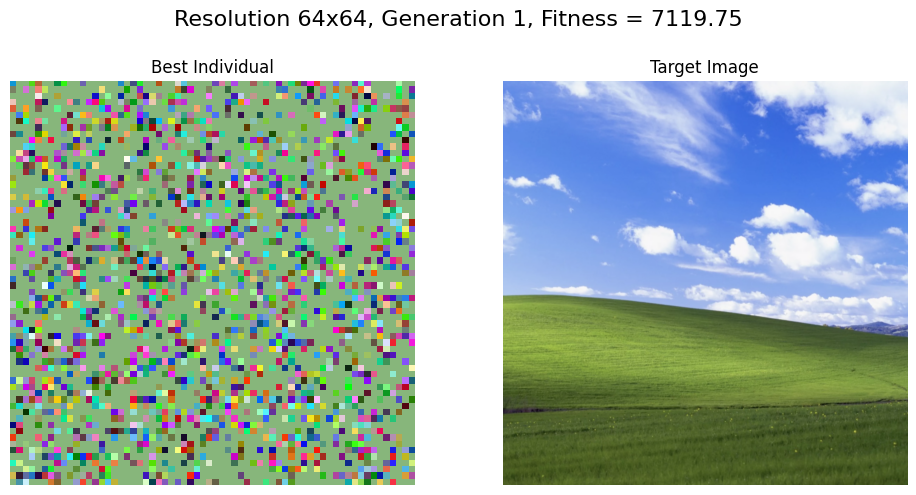

Generation 2/20000. Best fitness: 5887.769. Mutation rate: 0.350, time [04:07:30]


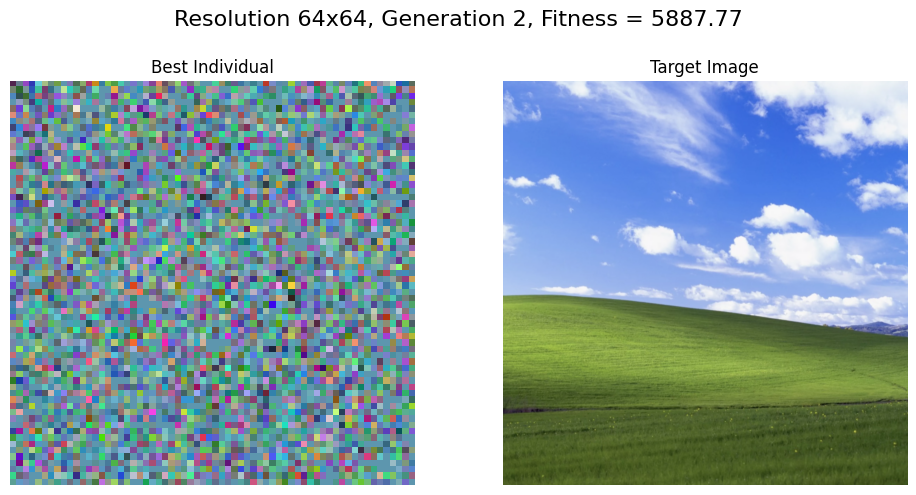

Generation 5/20000. Best fitness: 4656.295. Mutation rate: 0.350, time [04:07:31]


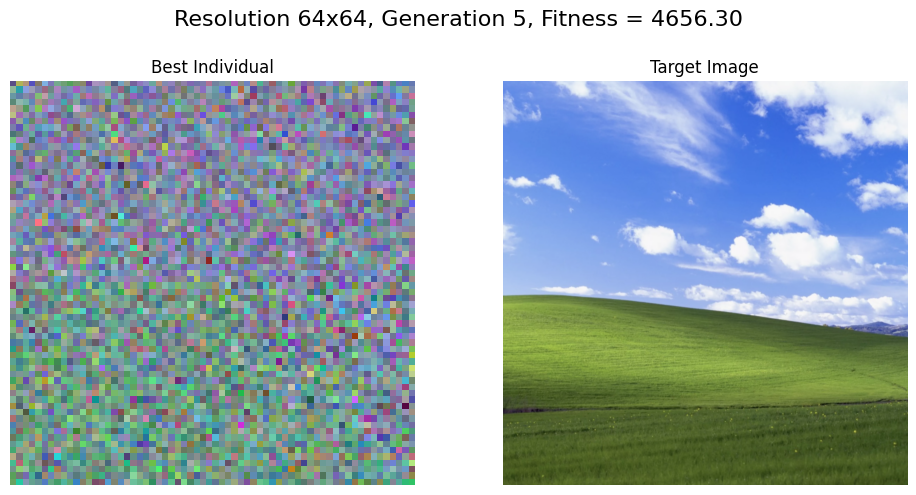

Generation 10/20000. Best fitness: 4551.237. Mutation rate: 0.335, time [04:07:32]


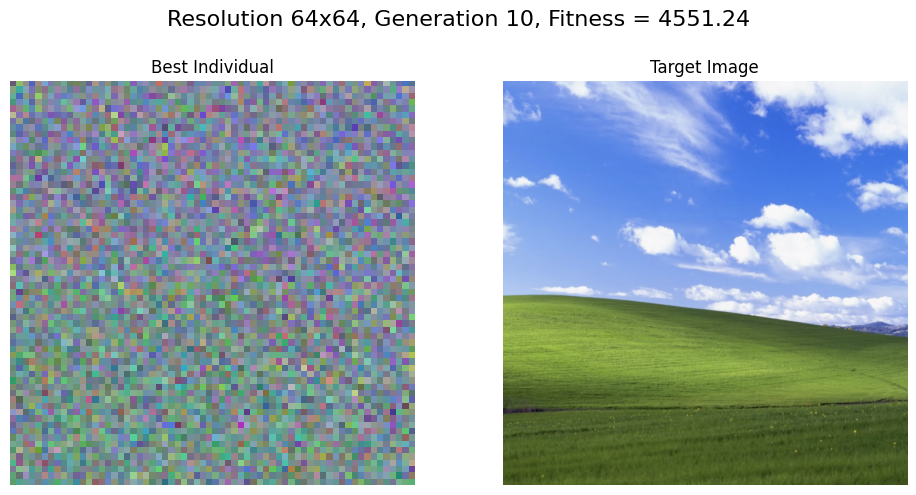

Generation 100/20000. Best fitness: 4505.302. Mutation rate: 0.213, time [04:07:37]


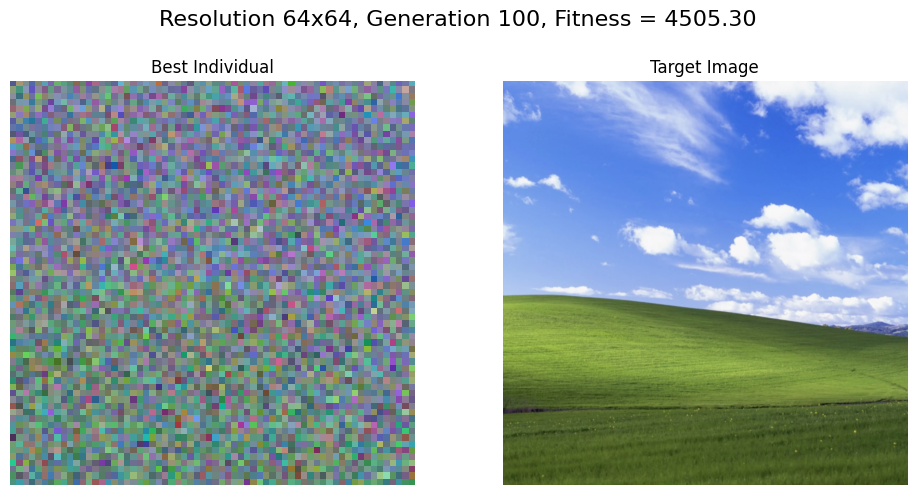

Stagnation detected at generation 191. Actual mutation rate: 0.150. Increasing mutation rate.
Generation 1000/20000. Best fitness: 3050.147. Mutation rate: 0.002, time [04:08:16]


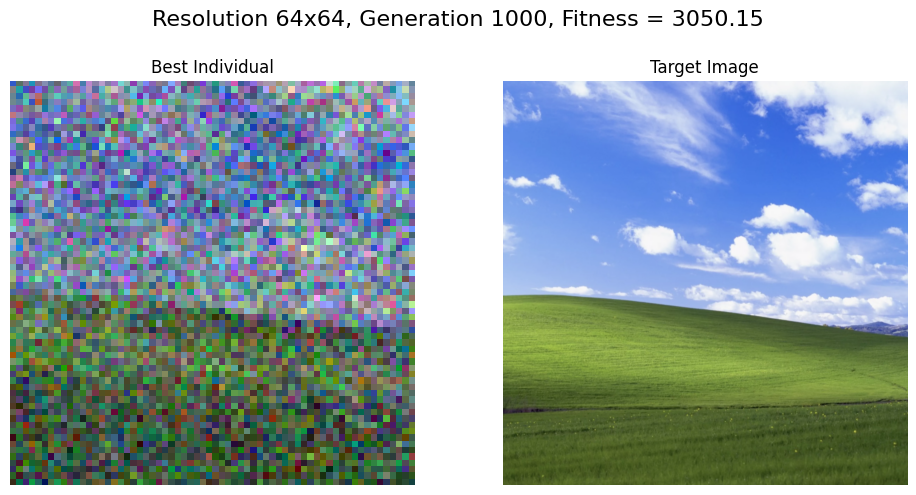

Generation 2000/20000. Best fitness: 2021.146. Mutation rate: 0.001, time [04:09:00]


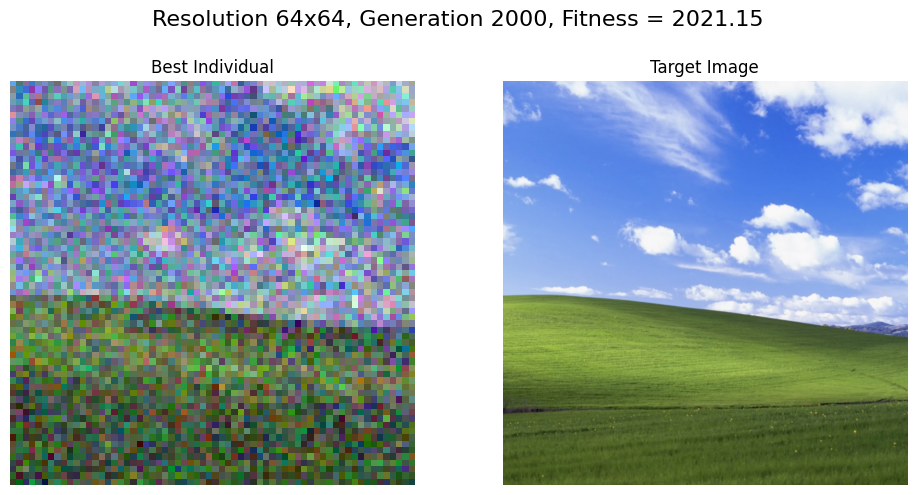

Generation 3000/20000. Best fitness: 1320.032. Mutation rate: 0.001, time [04:09:43]


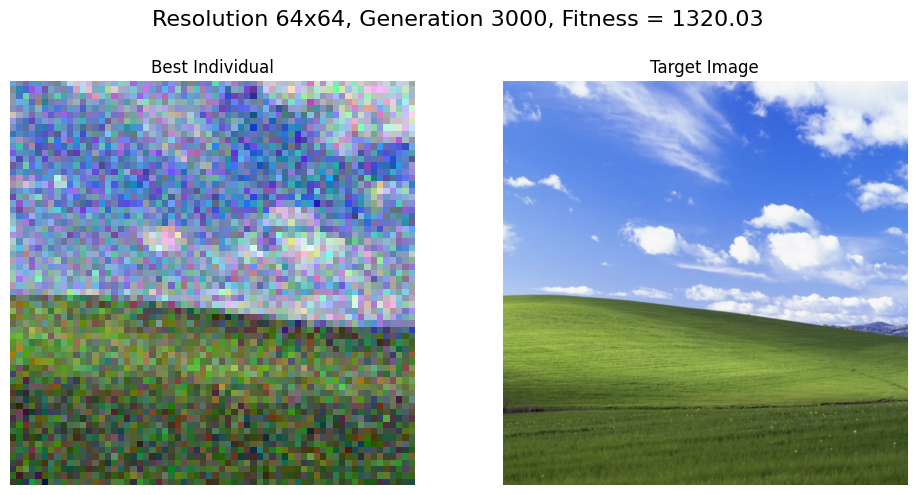

Generation 4000/20000. Best fitness: 824.642. Mutation rate: 0.001, time [04:10:27]


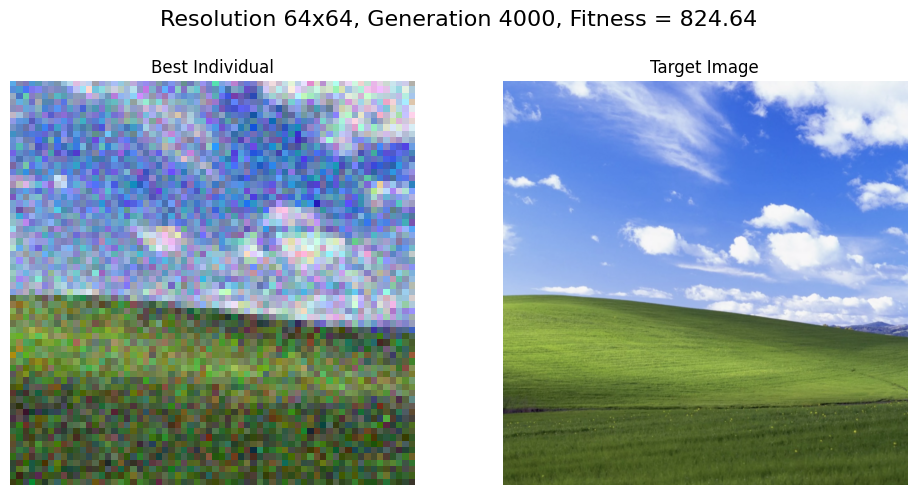

Generation 5000/20000. Best fitness: 492.987. Mutation rate: 0.001, time [04:11:10]


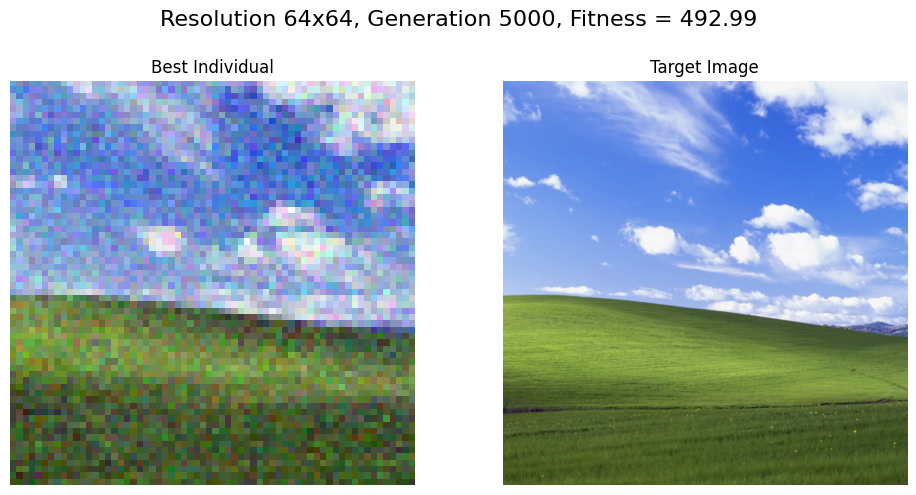

Generation 6000/20000. Best fitness: 295.991. Mutation rate: 0.001, time [04:11:54]


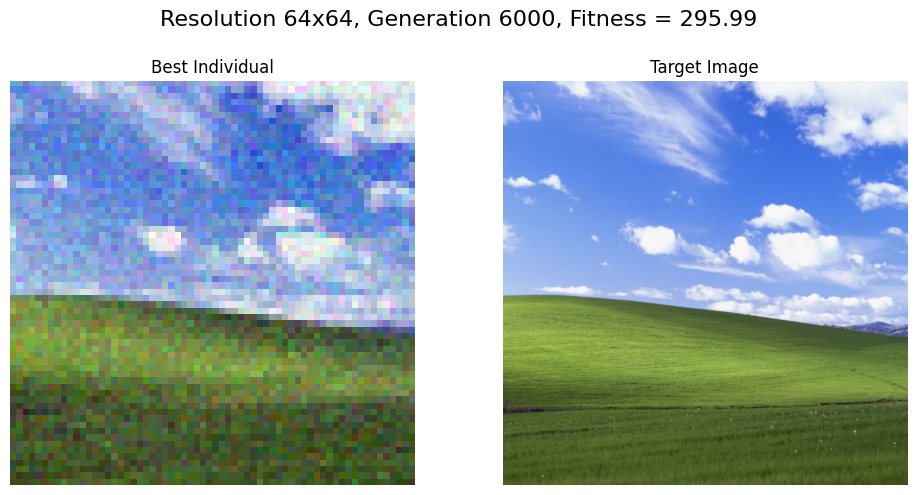

Generation 7000/20000. Best fitness: 181.289. Mutation rate: 0.001, time [04:12:37]


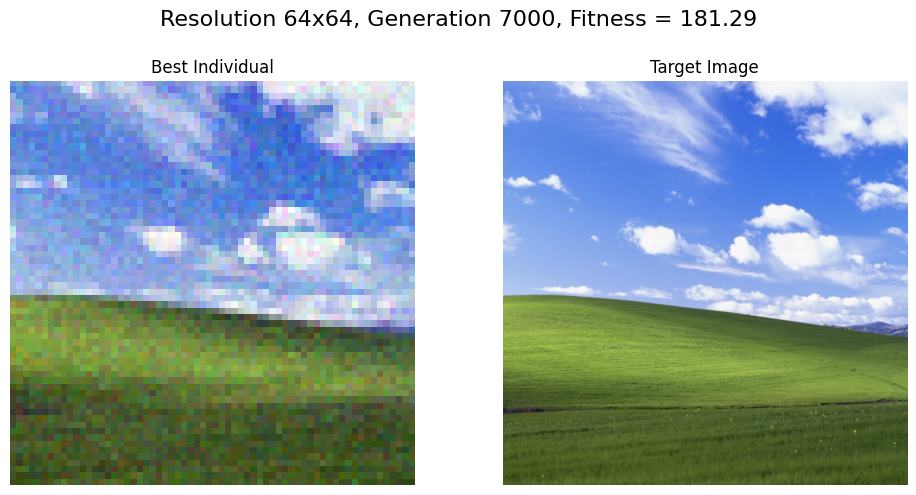

Generation 8000/20000. Best fitness: 118.634. Mutation rate: 0.001, time [04:13:20]


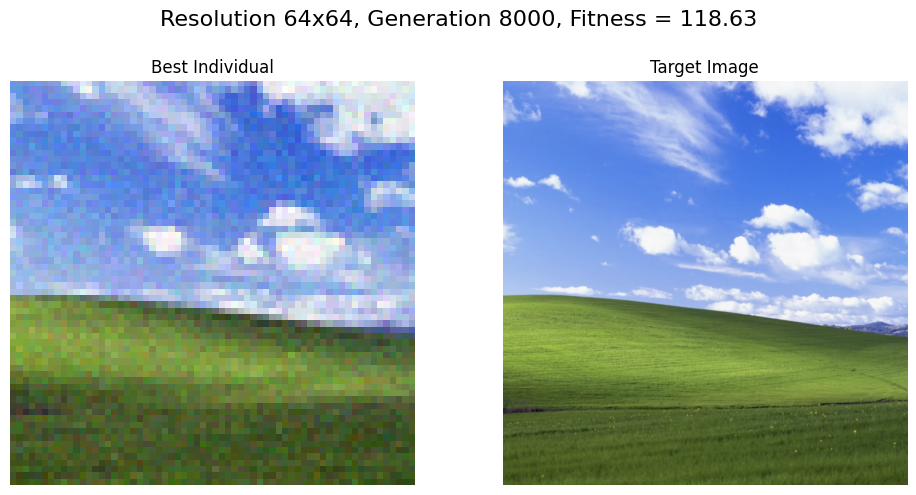

Generation 9000/20000. Best fitness: 83.967. Mutation rate: 0.001, time [04:14:04]


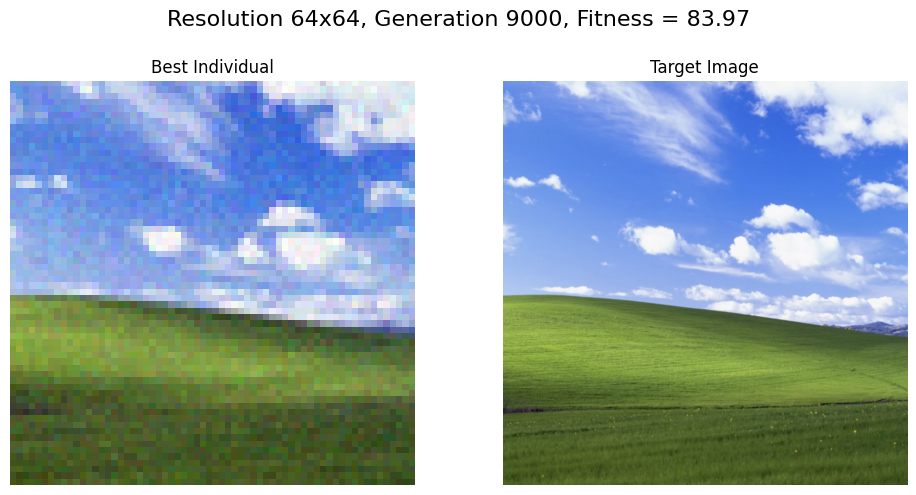

Generation 10000/20000. Best fitness: 63.025. Mutation rate: 0.001, time [04:14:47]


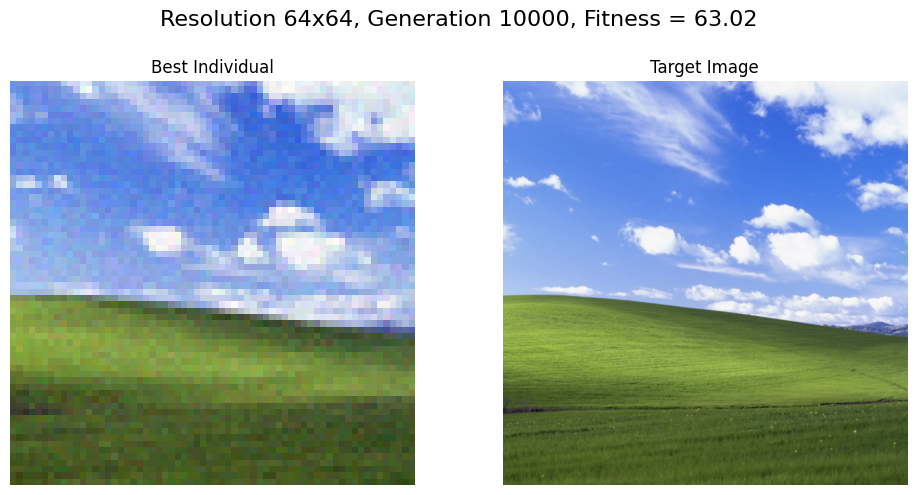

Generation 11000/20000. Best fitness: 51.321. Mutation rate: 0.001, time [04:15:31]


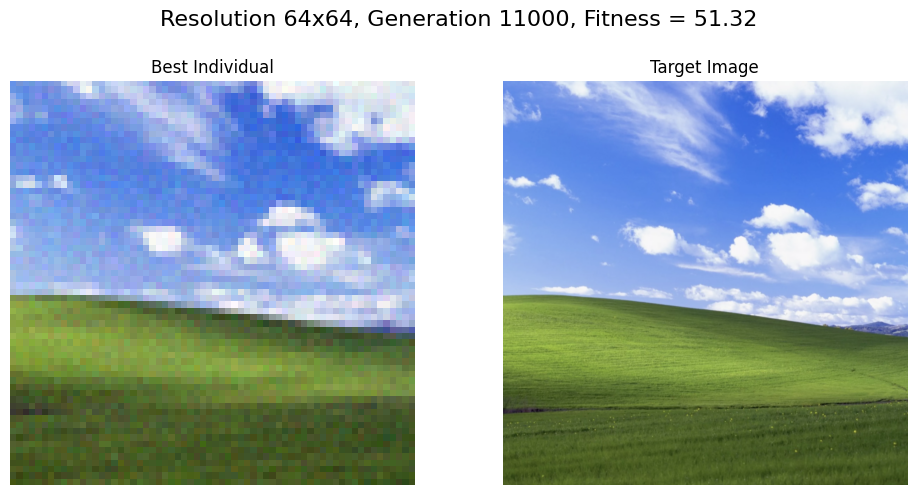

Generation 12000/20000. Best fitness: 43.011. Mutation rate: 0.001, time [04:16:14]


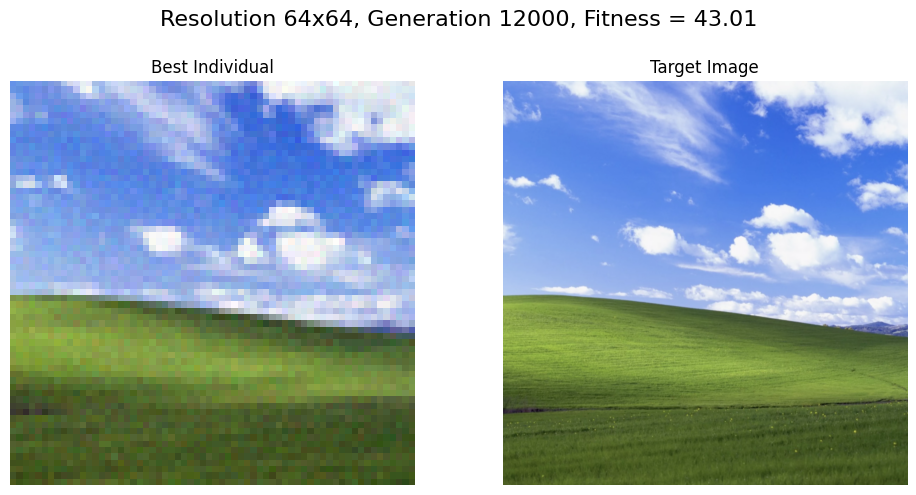

Generation 13000/20000. Best fitness: 36.688. Mutation rate: 0.001, time [04:16:58]


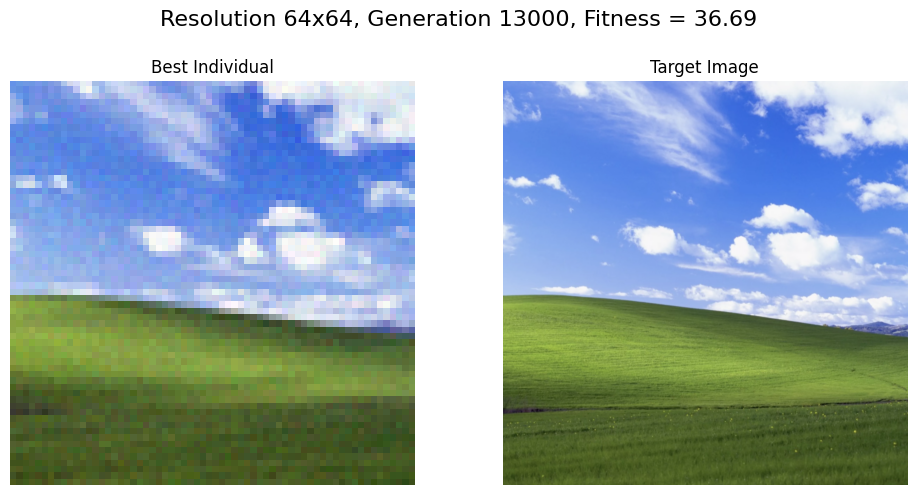

Generation 14000/20000. Best fitness: 32.215. Mutation rate: 0.001, time [04:17:42]


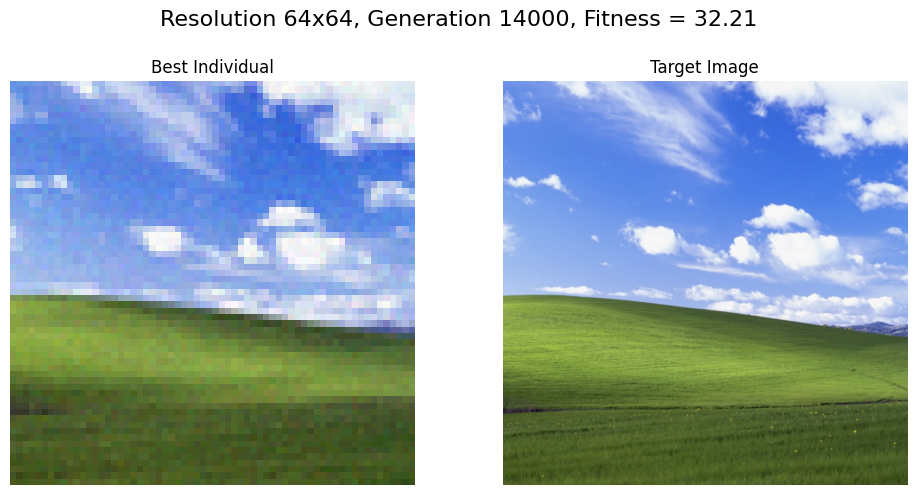

Generation 15000/20000. Best fitness: 28.543. Mutation rate: 0.001, time [04:18:26]


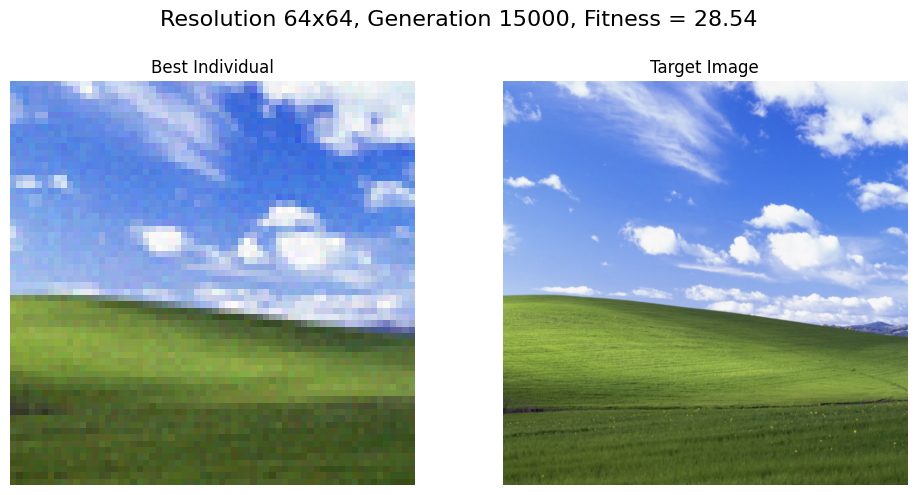

Generation 16000/20000. Best fitness: 25.616. Mutation rate: 0.001, time [04:19:08]


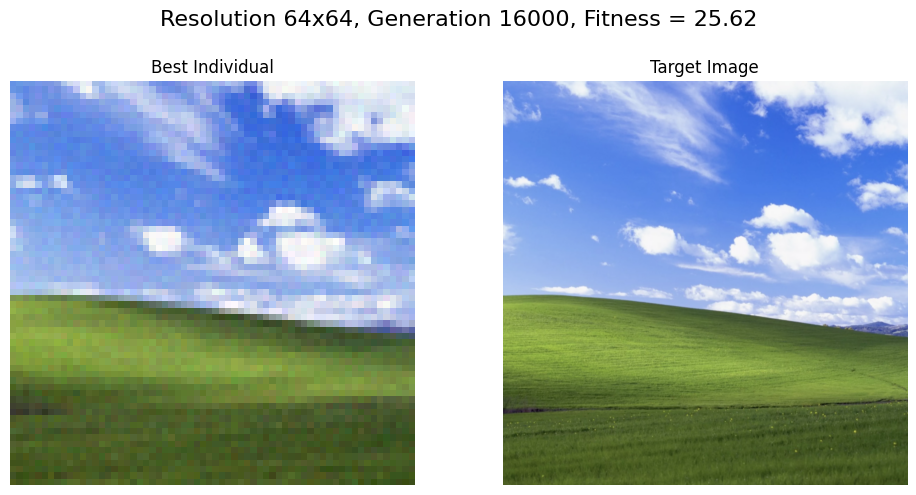

Generation 17000/20000. Best fitness: 23.217. Mutation rate: 0.001, time [04:19:52]


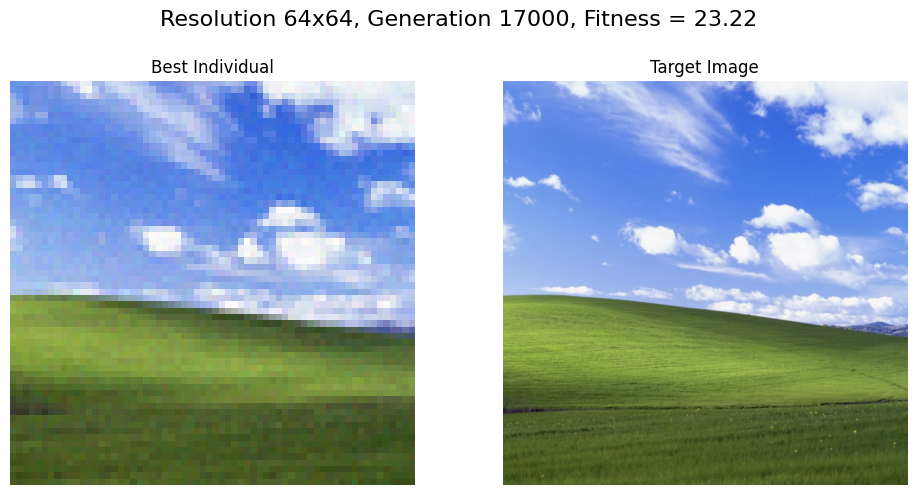

Generation 18000/20000. Best fitness: 21.161. Mutation rate: 0.001, time [04:20:36]


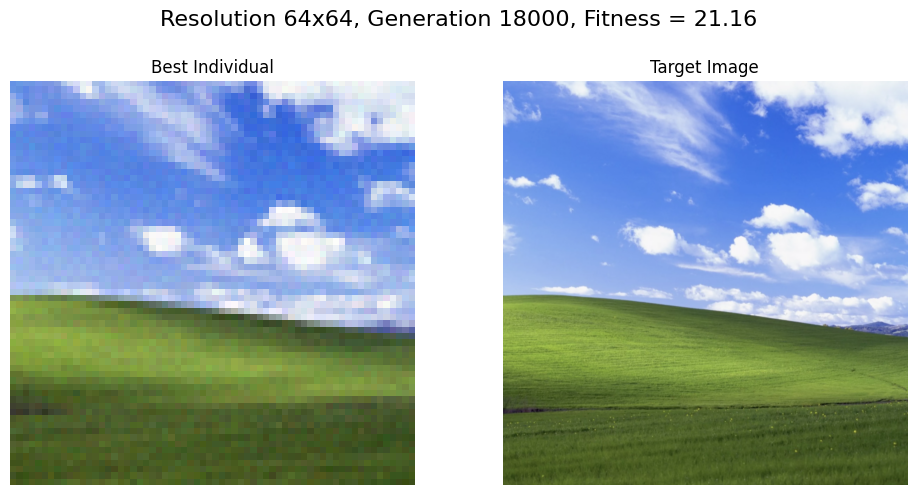

Generation 19000/20000. Best fitness: 19.534. Mutation rate: 0.001, time [04:21:21]


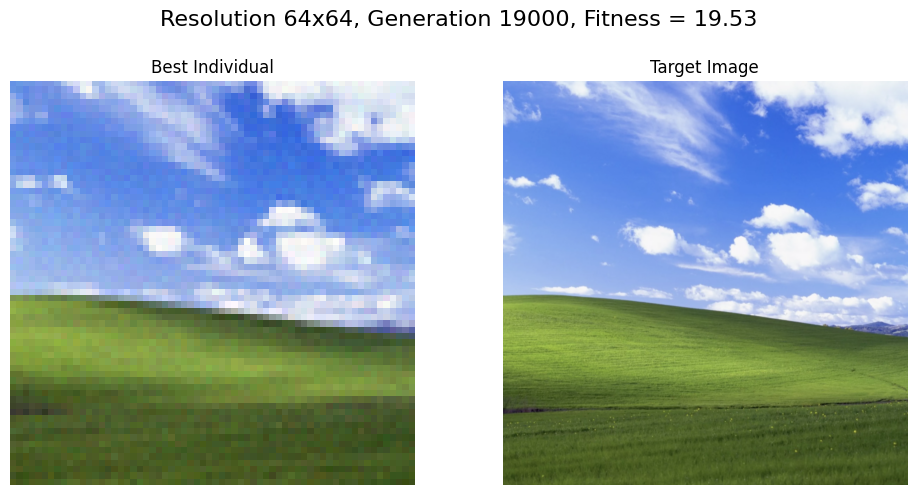

Generation 19999/20000. Best fitness: 18.126. Mutation rate: 0.001, time [04:22:05]


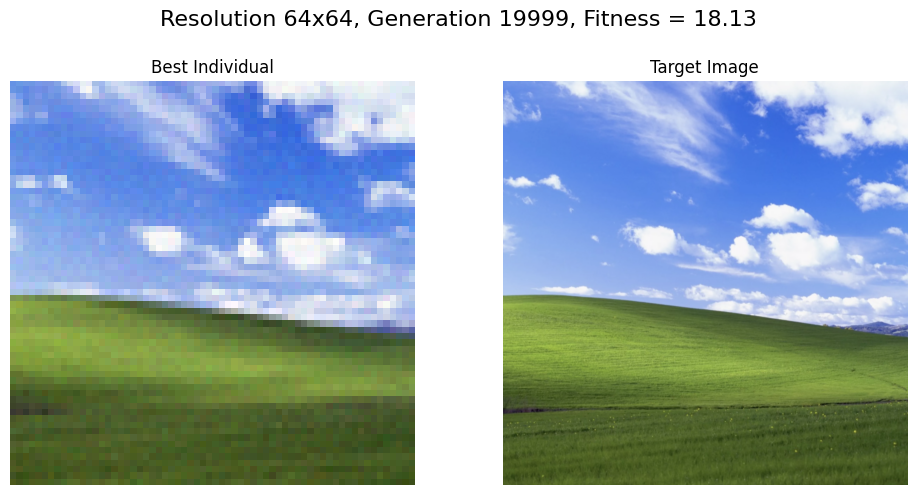

Generation 20000/20000. Best fitness: 18.123. Mutation rate: 0.001, time [04:22:05]


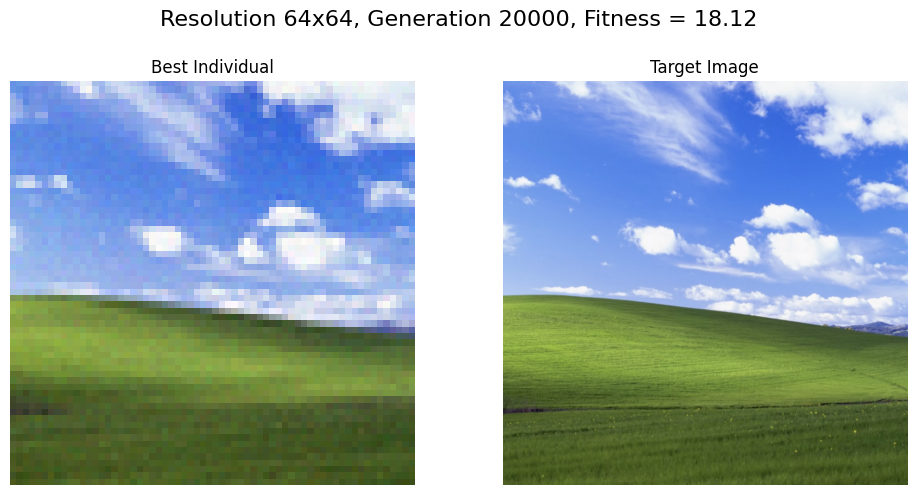

Data exported successfully.


In [2]:
start_time = time.time()
result_64, fitness_evolution_64 = evolve(image_path, 
           pop_size = 180, 
           palette_size = 256, 
           generations = 20000, 
           mutation_rate = 0.35,
           max_mutation_rate = 0.35,
           tournament_size = 10,
           replacement = 25,
           min_mutation_rate = 0.0005,
           stagnation_limit = 20,
           n = 64,
           fit = 'mse')
end_time = time.time()

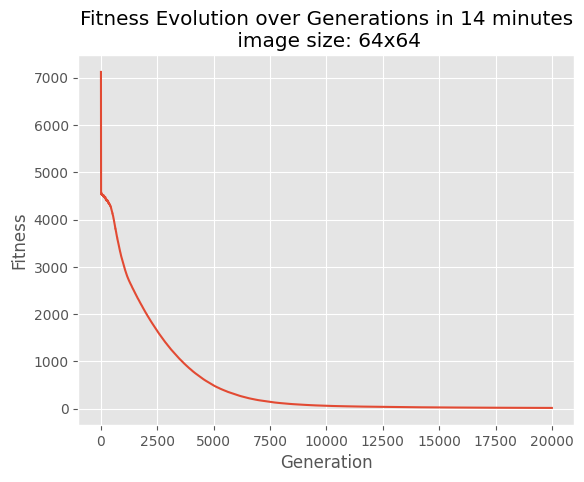

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(fitness_evolution_64)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title(f'Fitness Evolution over Generations in {((end_time - start_time)//60):.0f} minutes\n image size: 64x64')
plt.savefig('../evolution_64/fitness_evolution_64.png')
plt.show()

In [4]:
import os
from PIL import Image
n = 64

np.save(f'../evolution_{n}/best_ind.npy', result_64)

# Source images folder
folder_path = f"../evolution_{n}/images_{n}"  

# Output GIF file
output_gif = f"../evolution_{n}/output.gif"

# Read all images in the folder
images = []
for file_name in sorted(os.listdir(folder_path)):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(folder_path, file_name)
        img = Image.open(img_path).convert("RGBA")
        images.append(img)

# Create GIF
if images:
    images[0].save(
        output_gif,
        save_all=True,
        append_images=images[1:],
        duration=200, # milliseconds per frame
        loop=0  # infinite loop
    )
    print(f"GIF creation done: {output_gif}")
else:
    print("No images found in the folder.")

GIF creation done: ../evolution_64/output.gif
